Business Question with Python, Pandas, and Zelda.

   1.Is there a relationship between age demographics and average Game Rating?
   2.Is there a correlation between game sales and average game rating?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Chart Setting
font = {'family' : 'normal',
           'weight' : 'bold',
           'size'   : 16}

plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (40,18)

#Load Data
df = pd.read_excel('r_ZeldaGameRankingsSurvey.xlsx')

Clean/Split Data

              Dictionary of All columns name and there index number for reference

In [2]:
column_names = {}
for index, col_name in  enumerate(list(df.columns)):
    column_names[index] = col_name
column_names



{0: 'Timestamp',
 1: 'What was your first Zelda game that you played?',
 2: 'What was your first Zelda game that you Beat / Completed?',
 3: 'When did you start playing Zelda games?',
 4: 'Anything else you would like to add about your first Zelda games?',
 5: 'Which of the following official games have you played?  [Legend of Zelda - NES 1986]',
 6: 'Which of the following official games have you played?  [Zelda 2: Adventure of Link - NES 1987]',
 7: 'Which of the following official games have you played?  [A Link to the Past - SNES 1991]',
 8: "Which of the following official games have you played?  [Link's Awakening - GB 1993]",
 9: 'Which of the following official games have you played?  [Ocarina of Time - N64 1998]',
 10: "Which of the following official games have you played?  [Link's Awakening DX - GBC 1998]",
 11: "Which of the following official games have you played?  [Majora's Mask - N64 2000]",
 12: 'Which of the following official games have you played?  [Oracle of Ages - 

              Grab Only the data we need with iloc, Replace Zeros with nan, and rename columns

In [3]:
ratings_df = df.iloc[:,88:107].merge(df.iloc[:,108], left_index=True, right_index=True) #Seperate Ratings Columns and Age Column from dataframe

In [4]:
ratings_df

,Legend of Zelda - NES 1986.1,Zelda 2: Adventure of Link - NES 1987.1,A Link to the Past - SNES / GBA.1,Link's Awakening - GB / GBC / Switch.1,Ocarina of Time - N64 / 3DS.1,Majora's Mask - N64 /3DS.1,Oracle of Ages - GBC 2001.1,Oracle of Seasons - GBC 2001.1,Four Swords (Anniversary Ed.) - GBA / DS.1,The Wind Waker - GCN / Wii U.1,Four Swords Adventures - GCN 2004.1,The Minish Cap - GBA 2004.1,Twilight Princess - GCN / Wii / Wii U.1,Phantom Hourglass - DS 2007.1,Spirit Tracks - DS 2009.1,Skyward Sword - Wii / Switch.1,A Link Between Worlds - 3DS 2013.1,Tri Force Heroes - 3DS 2015.1,Breath of the Wild - Wii U / Switch.1,How old are you?
0,5.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,5.0,7.0,0.0,0.0,8.00,9.0,0.0,8.0,0.00,0.0,9.00,24-30
1,6.0,0.0,7.0,7.5,9.0,0.0,0.0,0.0,0.0,9.0,0.0,8.5,10.00,0.0,0.0,10.0,9.00,4.0,10.00,18-23
2,8.0,0.0,10.0,9.5,10.0,10.0,0.0,9.0,8.0,10.0,8.0,9.5,0.00,0.0,0.0,0.0,10.00,7.0,10.00,24-30
3,7.5,5.0,0.0,8.7,8.5,8.0,0.0,0.0,0.0,8.5,0.0,0.0,8.00,0.0,7.0,7.0,8.00,0.0,9.00,18-23
4,7.0,3.5,9.5,8.0,10.0,10.0,8.0,8.0,8.0,9.0,6.0,8.0,9.25,7.0,7.5,8.5,8.75,5.0,8.25,24-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,6.8,6.3,7.5,7.2,7.0,8.0,6.7,6.7,6.5,9.5,6.5,7.5,8.90,7.7,7.5,7.8,8.80,4.5,9.90,24-30
3694,7.0,5.0,8.0,8.0,10.0,9.0,0.0,0.0,0.0,10.0,7.0,9.0,7.00,0.0,0.0,9.0,9.00,6.0,10.00,13-17
3695,6.0,4.0,9.0,8.0,9.0,8.0,7.0,7.0,5.0,9.0,5.0,7.0,8.00,6.0,4.0,6.0,8.00,6.0,9.00,24-30
3696,0.0,0.0,8.0,8.0,10.0,7.0,0.0,0.0,5.0,7.0,0.0,8.0,9.00,6.0,7.0,8.0,9.00,7.0,10.00,24-30


In [5]:

ratings_df =ratings_df.replace(0, np.nan) # Replace all zeros with np.nan

#renamed columns without the question added release year/re-release years along with a 'M'  to for mobile only release
ratings_df.columns = [
       "Legend of Zelda 1987",
       "Zelda 2: Adventure of Link 1988",
       "A Link to the Past 1991/2002",
       "Link's Awakening 1993/1998/2019",
       "Ocarina of Time 1998/2003/2011",
       "Majora's Mask 2000/2015",
       "Oracle of Ages 2001 M",
       "Oracle of Seasons 2001 M",
       "Four Swords 2002 (Multiplayer) M",
       "The Wind Waker 2003/2013",
       'Four Swords Adv. 2004 (Multiplayer)',
       "The Minish Cap 2004 M",
       "Twilight Princess 2006/2016",
       "Phantom Hourglass 2007 M",
       "Spirit Tracks 2009 M",
       "Skyward Sword 2011/2021",
       "A Link Between Worlds 2013 M",
       "Tri Force Heroes 2015 (Multiplayer) M",
       "Breath of the Wild 2017",
        "Age"]

In [6]:
ratings_df.min(numeric_only = True)

Legend of Zelda 1987                     1.000000e+00
Zelda 2: Adventure of Link 1988          5.000000e-01
A Link to the Past 1991/2002             1.000000e+00
Link's Awakening 1993/1998/2019          1.000000e+00
Ocarina of Time 1998/2003/2011           1.000000e+00
Majora's Mask 2000/2015                  1.000000e+00
Oracle of Ages 2001 M                    1.000000e+00
Oracle of Seasons 2001 M                 1.000000e+00
Four Swords 2002 (Multiplayer) M         1.000000e+00
The Wind Waker 2003/2013                 1.000000e+00
Four Swords Adv. 2004 (Multiplayer)      1.000000e+00
The Minish Cap 2004 M                    1.000000e+00
Twilight Princess 2006/2016              1.000000e+00
Phantom Hourglass 2007 M                 1.000000e-01
Spirit Tracks 2009 M                     1.000000e-01
Skyward Sword 2011/2021                  1.000000e-07
A Link Between Worlds 2013 M             1.000000e+00
Tri Force Heroes 2015 (Multiplayer) M    1.000000e-01
Breath of the Wild 2017     

In [7]:
ratings_df.min(numeric_only = True).round(5) #show without e notation

Legend of Zelda 1987                     1.00
Zelda 2: Adventure of Link 1988          0.50
A Link to the Past 1991/2002             1.00
Link's Awakening 1993/1998/2019          1.00
Ocarina of Time 1998/2003/2011           1.00
Majora's Mask 2000/2015                  1.00
Oracle of Ages 2001 M                    1.00
Oracle of Seasons 2001 M                 1.00
Four Swords 2002 (Multiplayer) M         1.00
The Wind Waker 2003/2013                 1.00
Four Swords Adv. 2004 (Multiplayer)      1.00
The Minish Cap 2004 M                    1.00
Twilight Princess 2006/2016              1.00
Phantom Hourglass 2007 M                 0.10
Spirit Tracks 2009 M                     0.10
Skyward Sword 2011/2021                  0.00
A Link Between Worlds 2013 M             1.00
Tri Force Heroes 2015 (Multiplayer) M    0.10
Breath of the Wild 2017                  0.01
dtype: float64

In [8]:
#convert anything less the one to one
def round_up_almost_ones(value: float) -> float:
       if 1 > value > 0: #only check float less than 1 and greater then 0
              return 1.0
       else:
              return value


for col in ratings_df.columns:
       if col != 'Age':
              ratings_df[col] = ratings_df[col].apply(round_up_almost_ones)


ratings_df.min(numeric_only = True)

Legend of Zelda 1987                     1.0
Zelda 2: Adventure of Link 1988          1.0
A Link to the Past 1991/2002             1.0
Link's Awakening 1993/1998/2019          1.0
Ocarina of Time 1998/2003/2011           1.0
Majora's Mask 2000/2015                  1.0
Oracle of Ages 2001 M                    1.0
Oracle of Seasons 2001 M                 1.0
Four Swords 2002 (Multiplayer) M         1.0
The Wind Waker 2003/2013                 1.0
Four Swords Adv. 2004 (Multiplayer)      1.0
The Minish Cap 2004 M                    1.0
Twilight Princess 2006/2016              1.0
Phantom Hourglass 2007 M                 1.0
Spirit Tracks 2009 M                     1.0
Skyward Sword 2011/2021                  1.0
A Link Between Worlds 2013 M             1.0
Tri Force Heroes 2015 (Multiplayer) M    1.0
Breath of the Wild 2017                  1.0
dtype: float64

In [9]:
ratings_df.max(numeric_only = True)

Legend of Zelda 1987                     10.0
Zelda 2: Adventure of Link 1988          10.0
A Link to the Past 1991/2002             10.0
Link's Awakening 1993/1998/2019          10.0
Ocarina of Time 1998/2003/2011           10.0
Majora's Mask 2000/2015                  10.0
Oracle of Ages 2001 M                    10.0
Oracle of Seasons 2001 M                 10.0
Four Swords 2002 (Multiplayer) M         10.0
The Wind Waker 2003/2013                 10.0
Four Swords Adv. 2004 (Multiplayer)      10.0
The Minish Cap 2004 M                    10.0
Twilight Princess 2006/2016              10.0
Phantom Hourglass 2007 M                 10.0
Spirit Tracks 2009 M                     10.0
Skyward Sword 2011/2021                  10.0
A Link Between Worlds 2013 M             10.0
Tri Force Heroes 2015 (Multiplayer) M    10.0
Breath of the Wild 2017                  10.0
dtype: float64

Make sure age is correctly entered

In [10]:
ratings_df["Age"].sort_values().head()

1097    13-17
1579    13-17
2604    13-17
663     13-17
664     13-17
Name: Age, dtype: object

In [11]:
ratings_df["Age"].sort_values().tail(20)


3235    Prefer not to say
1777    Prefer not to say
1778    Prefer not to say
2906    Prefer not to say
3520    Prefer not to say
3521    Prefer not to say
2912    Prefer not to say
1805    Prefer not to say
269     Prefer not to say
1134    Prefer not to say
115                   NaN
225                   NaN
952                   NaN
1743                  NaN
2500                  NaN
2712                  NaN
2872                  NaN
3047                  NaN
3470                  NaN
3590                  NaN
Name: Age, dtype: object

In [26]:
ratings_df['Age'].drop(ratings_df["Age"].sort_values().tail(10).index)
ratings_df['Age'].sort_values().tail(20)

667     Prefer not to say
1828    Prefer not to say
1667    Prefer not to say
611     Prefer not to say
2522    Prefer not to say
297     Prefer not to say
627     Prefer not to say
3486    Prefer not to say
1159    Prefer not to say
1829    Prefer not to say
3235    Prefer not to say
1777    Prefer not to say
1778    Prefer not to say
2906    Prefer not to say
3520    Prefer not to say
3521    Prefer not to say
2912    Prefer not to say
1805    Prefer not to say
269     Prefer not to say
1134    Prefer not to say
Name: Age, dtype: object

In [13]:
ratings_df = ratings_df.drop(ratings_df["Age"].sort_values().tail(10).index)

Group Data Frame By Age Get the mean

In [14]:
ratings_by_age_df = ratings_df.groupby('Age').mean()
ratings_by_age_df

,Legend of Zelda 1987,Zelda 2: Adventure of Link 1988,A Link to the Past 1991/2002,Link's Awakening 1993/1998/2019,Ocarina of Time 1998/2003/2011,Majora's Mask 2000/2015,Oracle of Ages 2001 M,Oracle of Seasons 2001 M,Four Swords 2002 (Multiplayer) M,The Wind Waker 2003/2013,Four Swords Adv. 2004 (Multiplayer),The Minish Cap 2004 M,Twilight Princess 2006/2016,Phantom Hourglass 2007 M,Spirit Tracks 2009 M,Skyward Sword 2011/2021,A Link Between Worlds 2013 M,Tri Force Heroes 2015 (Multiplayer) M,Breath of the Wild 2017
Age,,,,,,,,,,,,,,,,,,,
13-17,6.155956,4.286015,7.491681,7.459475,8.590423,8.536528,6.281250,6.178125,5.408779,8.313774,5.752800,7.366265,8.483370,6.354683,6.603854,8.199252,7.793056,5.195856,9.155380
18-23,6.205321,4.653287,7.792167,7.696707,8.594317,8.671675,6.850872,6.721671,5.716933,8.349023,6.069028,7.531574,8.569471,6.612682,6.801803,8.009050,8.207290,5.255956,8.958729
24-30,6.576274,5.041974,8.140621,7.846017,8.931218,8.771800,7.462448,7.459196,5.782073,8.655986,6.384877,7.877769,8.632682,6.705814,6.559885,7.623408,8.197295,5.036871,8.980055
31-40,6.892686,5.247716,8.536479,8.051728,9.128484,8.676413,7.412870,7.389327,5.911951,8.436654,6.297706,7.635253,8.234659,6.289216,6.008856,7.323882,8.229810,5.193103,8.824171
41-55,8.082540,5.773684,8.679365,8.083929,8.629851,8.101786,6.769231,6.640000,5.941176,7.964151,6.400000,7.640000,8.183929,6.852778,6.413333,7.383333,8.083784,5.307692,9.201538
55+,5.500000,10.000000,5.500000,3.500000,8.333333,9.333333,6.000000,6.000000,NaN,9.866667,NaN,10.000000,9.333333,10.000000,10.000000,6.066667,10.000000,NaN,5.500000
Prefer not to say,6.126000,4.280488,7.688182,7.567241,8.197794,8.075000,6.200000,6.526316,5.885000,8.373462,6.538095,7.847222,8.115789,6.326562,6.455517,8.315079,8.183333,5.642857,8.522000


Transpose Dataset to games are the index and age groups are the Columns

In [15]:
ratings_by_age_df = ratings_by_age_df.transpose()
ratings_by_age_df

Age,13-17,18-23,24-30,31-40,41-55,55+,Prefer not to say
Legend of Zelda 1987,6.155956,6.205321,6.576274,6.892686,8.082540,5.500000,6.126000
Zelda 2: Adventure of Link 1988,4.286015,4.653287,5.041974,5.247716,5.773684,10.000000,4.280488
A Link to the Past 1991/2002,7.491681,7.792167,8.140621,8.536479,8.679365,5.500000,7.688182
Link's Awakening 1993/1998/2019,7.459475,7.696707,7.846017,8.051728,8.083929,3.500000,7.567241
Ocarina of Time 1998/2003/2011,8.590423,8.594317,8.931218,9.128484,8.629851,8.333333,8.197794
Majora's Mask 2000/2015,8.536528,8.671675,8.771800,8.676413,8.101786,9.333333,8.075000
Oracle of Ages 2001 M,6.281250,6.850872,7.462448,7.412870,6.769231,6.000000,6.200000
Oracle of Seasons 2001 M,6.178125,6.721671,7.459196,7.389327,6.640000,6.000000,6.526316
Four Swords 2002 (Multiplayer) M,5.408779,5.716933,5.782073,5.911951,5.941176,NaN,5.885000
The Wind Waker 2003/2013,8.313774,8.349023,8.655986,8.436654,7.964151,9.866667,8.373462


Get value counts of Age Groups

In [16]:
ratings_df['Age'].value_counts()

18-23                1129
24-30                1061
31-40                 676
13-17                 634
Prefer not to say      97
41-55                  85
55+                     6
Name: Age, dtype: int64

Remove '55+' for being too small of a sample size and Remove  'Prefer not to  say' for not being irrelevant

In [17]:
ratings_by_age_df = ratings_by_age_df.drop(columns=['Prefer not to say', '55+'])

Add years range when age group was age 12 to column names

In [18]:
age_list = list(ratings_by_age_df.columns)
for index, string in enumerate(age_list):
       min_age , max_age = string.split('-')
       min_age = int(min_age)
       max_age = int(max_age)
       age_list[index] = f'{string} age 12 around: {2021 - min_age + 12}-{2021 - max_age + 12} '
ratings_by_age_df.columns = age_list




Graph Results!

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


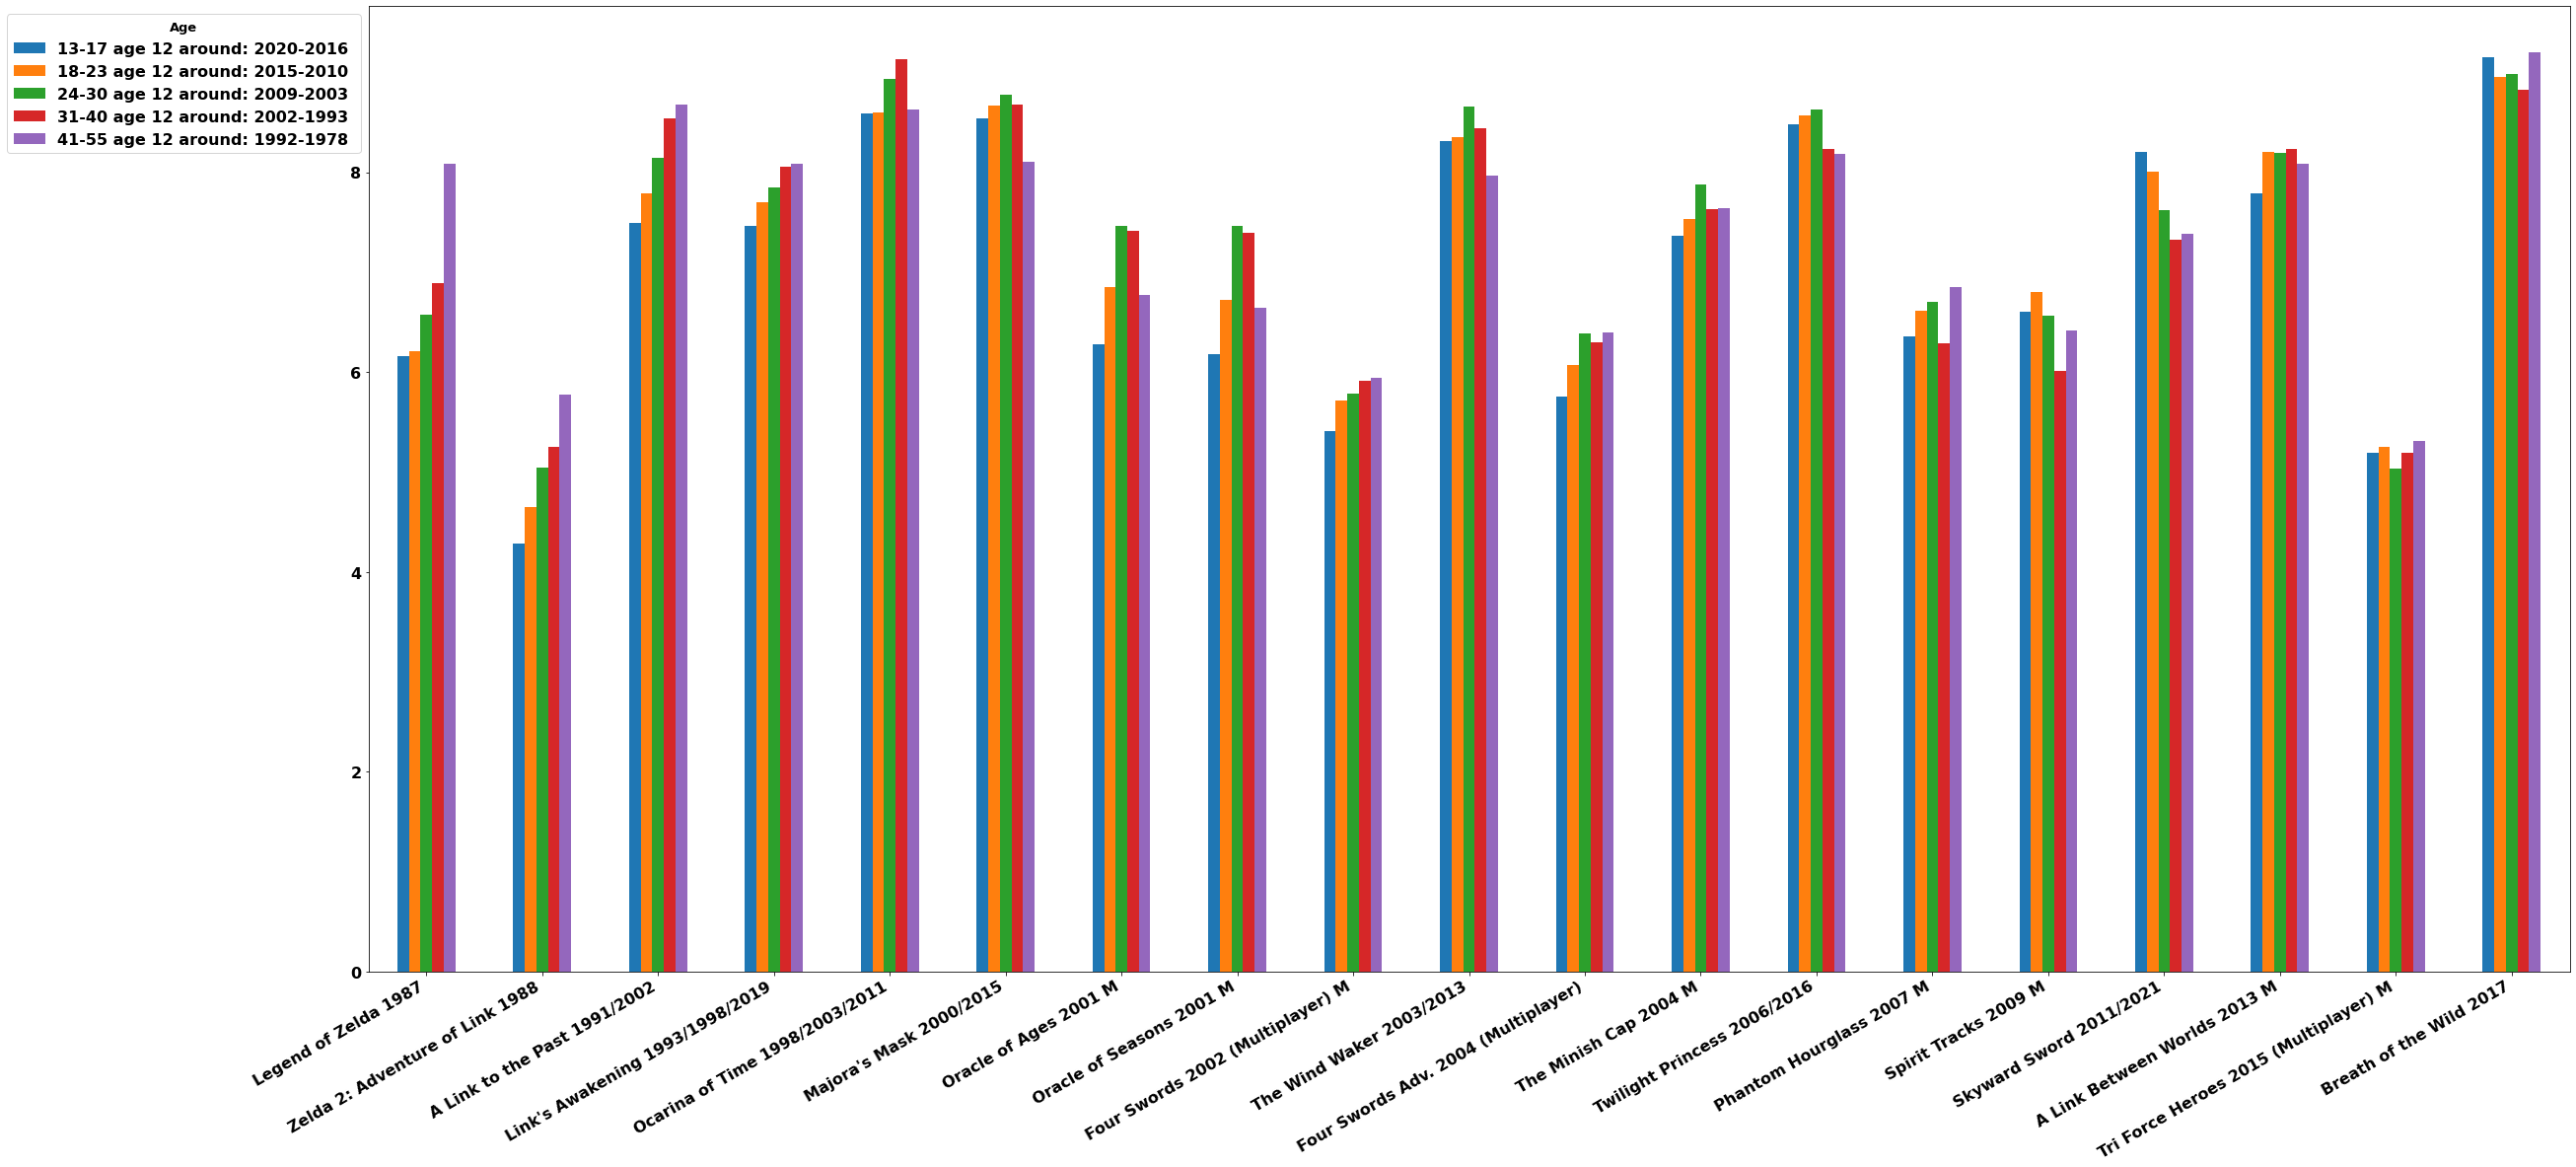

In [19]:
bar = ratings_by_age_df.plot.bar()
_ = bar.legend(title= 'Age', title_fontsize = 13, bbox_to_anchor= (0, 1))
_ =plt.xticks(rotation=30, ha="right")

In [20]:
ratings_only_df = ratings_df.drop(columns='Age')
ratings_only_df.columns

Index(['Legend of Zelda 1987', 'Zelda 2: Adventure of Link 1988',
       'A Link to the Past 1991/2002', 'Link's Awakening 1993/1998/2019',
       'Ocarina of Time 1998/2003/2011', 'Majora's Mask 2000/2015',
       'Oracle of Ages 2001 M', 'Oracle of Seasons 2001 M',
       'Four Swords 2002 (Multiplayer) M', 'The Wind Waker 2003/2013',
       'Four Swords Adv. 2004 (Multiplayer)', 'The Minish Cap 2004 M',
       'Twilight Princess 2006/2016', 'Phantom Hourglass 2007 M',
       'Spirit Tracks 2009 M', 'Skyward Sword 2011/2021',
       'A Link Between Worlds 2013 M', 'Tri Force Heroes 2015 (Multiplayer) M',
       'Breath of the Wild 2017'],
      dtype='object')

In [21]:

total_sales_series = pd.Series({
       "Legend of Zelda 1987" : 6.51 ,
       "Zelda 2: Adventure of Link 1988" : 4.38,
       "A Link to the Past 1991/2002" : 4.61 + 2.82 ,
       "Link's Awakening 1993/1998/2019" : 3.83 + 2.2 +  5.49 ,
       "Ocarina of Time 1998/2003/2011" : 7.6 + 6.22,
       "Majora's Mask 2000/2015" : 3.36 +  3.28,
       "Oracle of Ages 2001 M" : 3.99,
       "Oracle of Seasons 2001 M" : 3.99,
       "Four Swords 2002 (Multiplayer) M" : 2.82,  # only included in the link to the past Game Boy Advance release
       "The Wind Waker 2003/2013" : 4.43 +  2.35 ,
       #"Four Swords Adv. 2004 (Multiplayer)",  no global data sales!
       "The Minish Cap 2004 M" : 1.76,
       "Twilight Princess 2006/2016" : 8.85 + 1.13,
       "Phantom Hourglass 2007 M" : 4.76,
       "Spirit Tracks 2009 M" : 2.96,
       "Skyward Sword 2011/2021" : 3.67 + 3.85,
       "A Link Between Worlds 2013 M" : 4.16,
       "Tri Force Heroes 2015 (Multiplayer) M" : 1.34,
       "Breath of the Wild 2017" : 27.5})

In [22]:
ratings_only_df = ratings_only_df.mean().transpose()
ratings_only_df

Legend of Zelda 1987                     6.497388
Zelda 2: Adventure of Link 1988          4.879335
A Link to the Past 1991/2002             8.031859
Link's Awakening 1993/1998/2019          7.784582
Ocarina of Time 1998/2003/2011           8.790262
Majora's Mask 2000/2015                  8.662336
Oracle of Ages 2001 M                    7.134893
Oracle of Seasons 2001 M                 7.087845
Four Swords 2002 (Multiplayer) M         5.745733
The Wind Waker 2003/2013                 8.453364
Four Swords Adv. 2004 (Multiplayer)      6.212024
The Minish Cap 2004 M                    7.654970
Twilight Princess 2006/2016              8.496516
Phantom Hourglass 2007 M                 6.558965
Spirit Tracks 2009 M                     6.549274
Skyward Sword 2011/2021                  7.787803
A Link Between Worlds 2013 M             8.146070
Tri Force Heroes 2015 (Multiplayer) M    5.181903
Breath of the Wild 2017                  8.962733
dtype: float64

In [23]:
ratings_only_df = ratings_only_df.to_frame().merge(total_sales_series.rename("Sales Per Million"), left_index=True,  right_index=True)
ratings_only_df

,0,Sales Per Million
Legend of Zelda 1987,6.497388,6.51
Zelda 2: Adventure of Link 1988,4.879335,4.38
A Link to the Past 1991/2002,8.031859,7.43
Link's Awakening 1993/1998/2019,7.784582,11.52
Ocarina of Time 1998/2003/2011,8.790262,13.82
Majora's Mask 2000/2015,8.662336,6.64
Oracle of Ages 2001 M,7.134893,3.99
Oracle of Seasons 2001 M,7.087845,3.99
Four Swords 2002 (Multiplayer) M,5.745733,2.82
The Wind Waker 2003/2013,8.453364,6.78


In [24]:
ratings_only_df.columns = ['Average Rating', 'Sales Per Million']

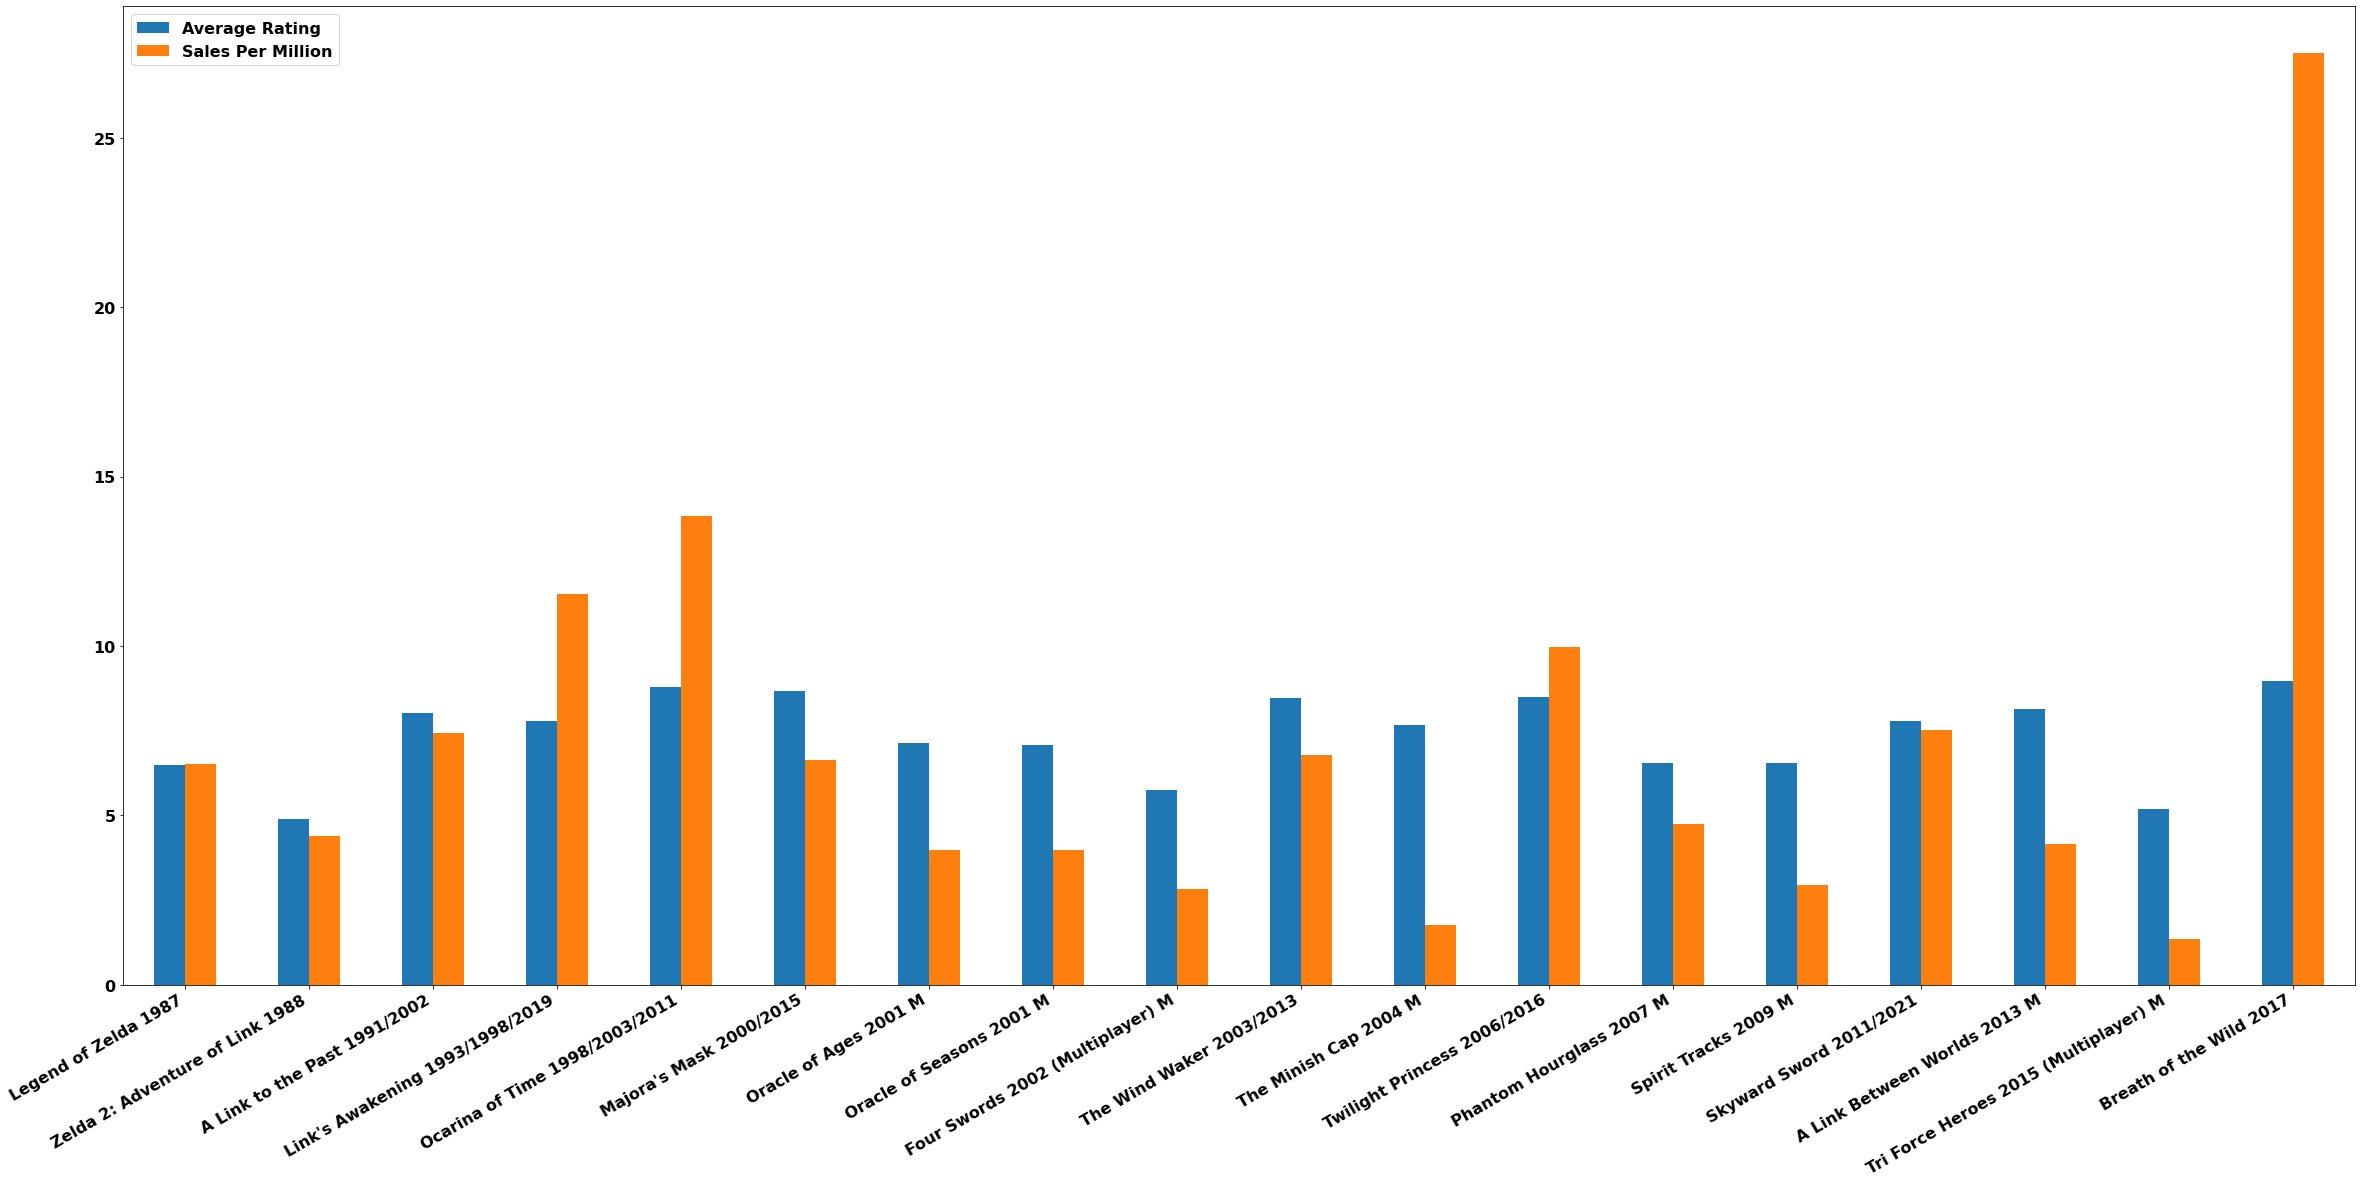

In [25]:

plot = ratings_only_df.plot.bar()
_ =plt.xticks(rotation=30, ha="right")


